<a href="https://colab.research.google.com/github/seirah-yang/F_roject/blob/main/16_Regular_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) 정규 표현식과 메타문자의 개념
2) 메타문자와 Re 라이브러리를 사용하여 문자열 내에서 패턴 찾기
3) 메타문자를 활용하여 문자열을 변경 또는 분리

## 1. 정규 표현식이란: Regular Expression
문자열 내에서 특정 패턴을 찾기위한 식으로 복잡한 문자열 중에서 원하는 조건에 맞는 부분을 추출하거나 확인할수 있다.

        활용)
        - 병원같은 의료기관에서는 환자의 진단 기록, 검사 결과, 처방 정보 개인정보를 추출할때 활용 가능
        - 메타문자로 문자열에 특정 패턴을 설정 가능

o 정규식에 사용되는 메타문자와 설명 및 예시

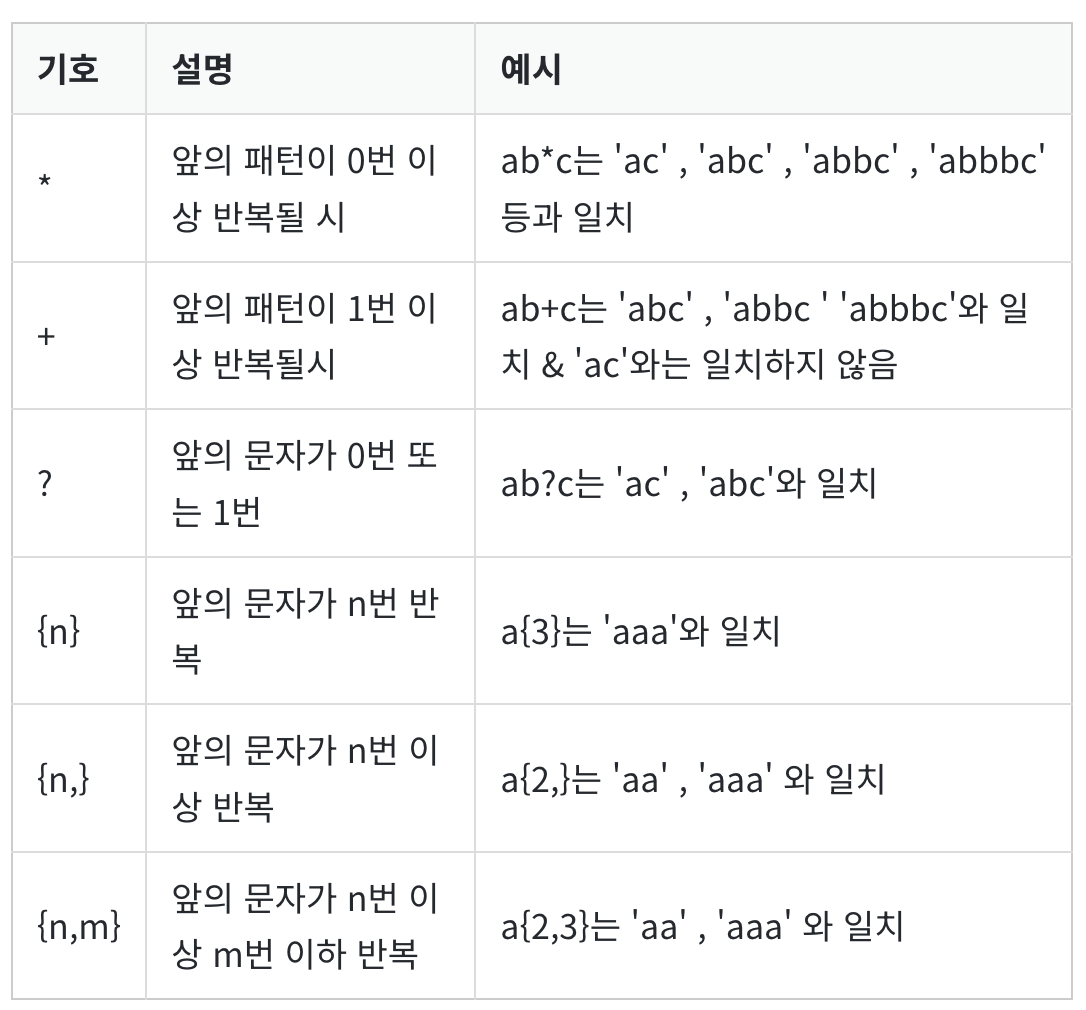표16.1




표16.3 문자 클래스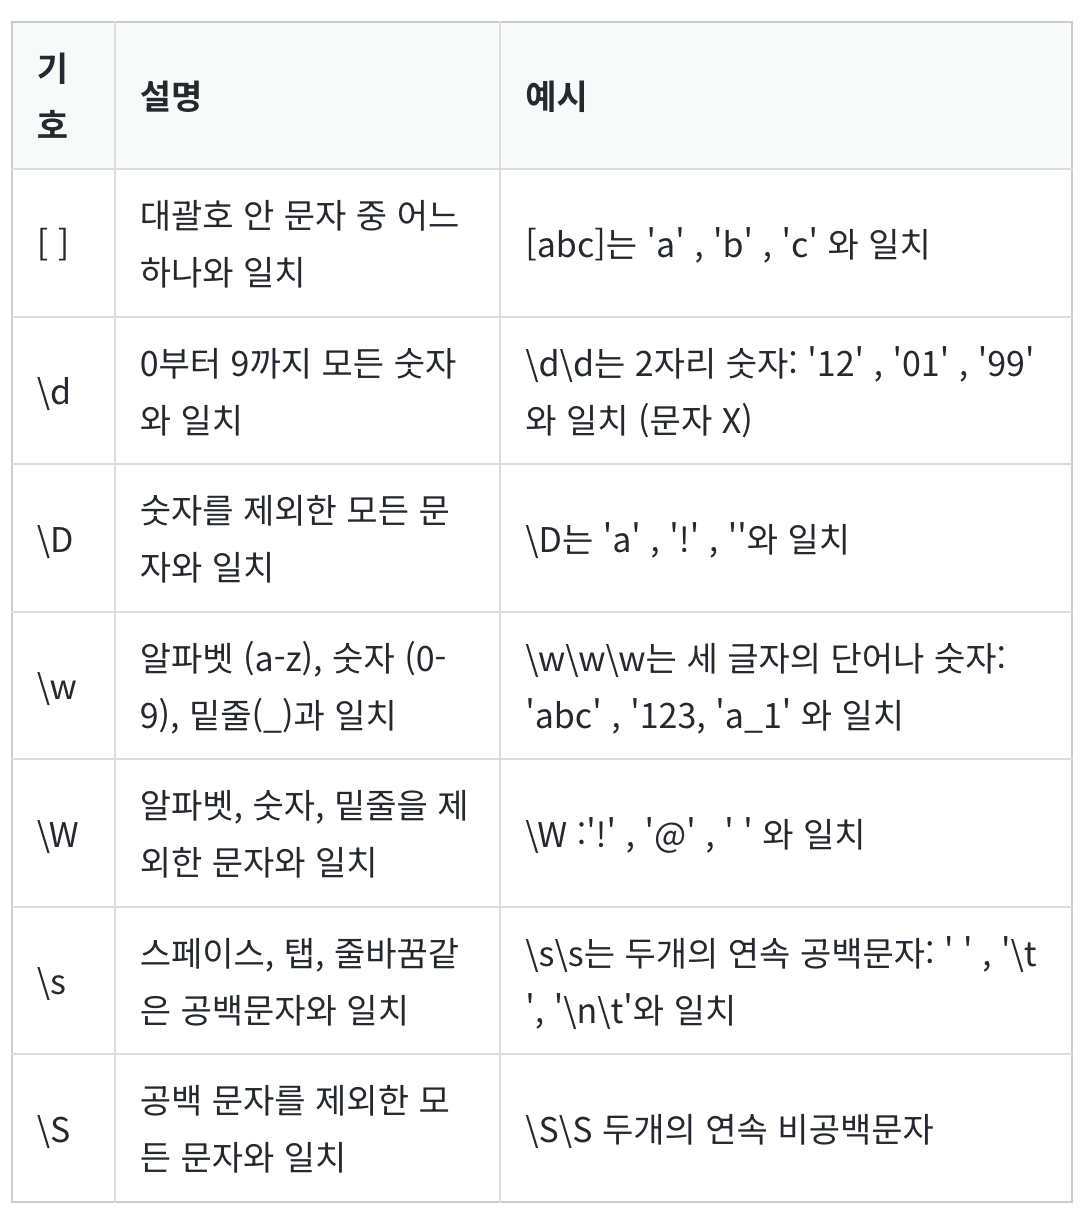

## 2. search, match, findall 함수로 문자열 찾기
메타문자들은 정규 표현식의 패턴을 정의하는데 사용

- re Library의 함수들과 조합하여 문자열 내에서 다양한 패턴을 쉽게 찾기위해 대표적인 함수 사용

        o re.search 함수
        - re 라이브러리에 내장되어있는 search 함수를 사용하면 주어진 문자열 전체에서 특정 패턴이나 단어가 있는지 확인할수 있다.
        - 기본구조 : re.search('pattern','string')
        - 첫번째 파라미터 = 찾고자 하는 단어
        - 두번째 파라미터 = string 문자열


In [1]:
# search 함수 기본 사용법
import re
result = re.search("정규", '정규 표현식 다루기: Regular expression')
if result:
    print("Match")
else:
    print("Not Found")

Match


In [2]:
result= re.search("예시", "정규 표현식 다루기: Regular expression")
if result:
    print("Match")
else:
    print("Not Found")

Not Found


## o re.search 함수와 메타문자: ^

표 16.1의** ^ 는 특정 단어로 시작하는 문자열을 찾는 메타문자** 입니다.
- 'Conditions' 컬럼의 각 값을 lambda를 통해 패턴을 확인한 후 'Covid'로 시작 (^) 하는 문자열만을 포함하는 데이터프레임을 생성할수 있다.
- 'Conditions' 값을 확인하기위해 데이터프레임을 출력하면 모두 'Covid'로 시작됨을 확인할수 있다.



In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parulpandey/covid19-clinical-trials-dataset")

print("Path to dataset files:", file_path1)

100%|██████████| 27.4M/27.4M [00:00<00:00, 125MB/s]

Extracting files...


Path to dataset files: /content/COVID clinical trials.csv


In [19]:
import os
os.path.exists("/content/COVID clinical trials.csv")

False

In [20]:
#COVID 원본 데이터프레임 확인 -> 저장
file_path1 = "/content/COVID clinical trials.csv"

In [23]:
	# kaggle에서 다운받은 파일은 /content/에 있는 게 아니라 KaggleHub 캐시 경로 안에 있다.
	# os.listdir(path)로 실제 파일명을 확인한 후, 그 경로를 정확히 지정해야 읽을 수 있다.

# 실제 저장된 파일경로 확인
import os
print(path)                     # kagglehub가 반환한 경로 확인
print(os.listdir(path))  #경로 안에 어떤 파일들이 있는지 확인

/root/.cache/kagglehub/datasets/parulpandey/covid19-clinical-trials-dataset/versions/10
['COVID clinical trials.csv', 'COVID-19 CLinical trials studies']


In [25]:
# 정확한 파일 경로로 불러오기
# 출력 결과: ['COVID clinical trials.csv', 'COVID-19 CLinical trials studies']

#경로 지정
file_path1 = os.path.join(path, 'COVID clinical trials.csv')
df = pd.read_csv(file_path1)
df.head(5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [27]:
df.Conditions.head(10)

,Conditions
0,Covid19
1,SARS-CoV-2 Infection
2,covid19
3,COVID
4,Maternal Fetal Infection Transmission|COVID-19...
5,COVID 19
6,Covid19|Exclusive Breastfeeding
7,Covid19|Type2 Diabetes
8,Covid19
9,COVID-19 Infection|Cancer Patients|General Pop...


In [30]:
# 메타문자 ^와 search함수 사용
    # re 라이브러리 불러오기
import re
# 'Covid'로 시작하는 문자열 찾기 위한 패턴 컴파일
pattern = re.compile("^Covid")
pattern

re.compile(r'^Covid', re.UNICODE)

In [31]:
# Conditions 모든 값을 가져워 "Covid"로 시작하는 값을 가진 행 저장
filtered_df = df[df['Conditions'].apply(lambda x: bool(pattern.search(x)))]

In [32]:
# filtered_df 데이터프레임 확인
filtered_df[['Rank', 'NCT Number', 'Conditions']].head(10)

,Rank,NCT Number,Conditions
0,1,NCT04785898,Covid19
6,7,NCT04476940,Covid19|Exclusive Breastfeeding
7,8,NCT04634214,Covid19|Type2 Diabetes
8,9,NCT04602884,Covid19
11,12,NCT04412265,Covid19
12,13,NCT04659759,Covid19
14,15,NCT04842708,Covid19
16,17,NCT04609969,Covid19|SARS-CoV-2 Infection
18,19,NCT04632355,Covid19
19,20,NCT04407585,Covid-19


In [33]:
# ^ 외의 메타문자들 사용해보기: 표 16.2 반복지정 메타문자 사용
# ^외의 메타문자 예시와 뜻: *, {n}, {n,m}, []
# *: 'Covi' 다음에 'd' 가 0번 이상 반복되는 문자열을 찾기 위한 규칙 만들기
pattern = re.compile("Covid*")

In [34]:
# {n}: 'Covi' 다음에 'd'가 정확히 3번 반복되는 문자열 찾기위한 규칙 만들기
pattern = re.compile("Covid{3}")

In [35]:
# {n,m}: 'Covi' 다음에 'd'가 2번에서 4번 반복되는 문자열 찾기위한 규칙 만들기
pattern = re.compile("Covid {2,4}")

In [36]:
# [ ]: 'Covid' 뒤에 '19' 또는 '20'이 오는 문자열 찾기위한 규칙 만들기
pattern = re.compile("Covid [19|20] ")

## o match 함수
 match 함수는 문자열의 시작 부분에서 정규 표현식 패턴과 일치하는지 확인하는 함수
- 기본 구조로: result = re.match(pattern, string)
- 첫번째 파라미터: pattern에는 검색할 정규표현식
- 두번째 파라미터: string에는 검색할 대상의 문자열
       
        예시)
         match 함수를 사용하여 'Conditions' 열 값 중 'Covid19'로 시작하는 값들만을 포함하는 데이터프레임을 생성할수 있다.
         데이터프레임 출력시 모두 'Covid19'으로 시작하는것을 확인할수 있다.

In [37]:
# 메타문자 ^ 와 match 함수
# 'Covid19' 값을 pattern2로 컴파일
pattern2 = re.compile("Covid19")

In [38]:
#  df['Conditions']의 값 중'Covid19'로 시작하는 값을 가진 행만 데이터프레임에 저장
filtered_df2 = df[df[ 'Conditions' ].apply(lambda x: bool( pattern2.match(x) ))]

In [39]:
# Rank, NCT Number, Conditions 3개 열 상위 10 행 출력
filtered_df2[['Rank', 'NCT Number','Conditions']].head(10)

,Rank,NCT Number,Conditions
0,1,NCT04785898,Covid19
6,7,NCT04476940,Covid19|Exclusive Breastfeeding
7,8,NCT04634214,Covid19|Type2 Diabetes
8,9,NCT04602884,Covid19
11,12,NCT04412265,Covid19
12,13,NCT04659759,Covid19
14,15,NCT04842708,Covid19
16,17,NCT04609969,Covid19|SARS-CoV-2 Infection
18,19,NCT04632355,Covid19
20,21,NCT04657510,Covid19|Femur Fracture|Fragility Fracture


## o findall 함수
findall 함수는 문자열 내에서 주어진 패턴과 일치하는 부분을 모두 찾아 리스트 형태로 반환하여 리스트의 길이를 통해 패턴이 문자열에 몇번 포함되었는지 확인

In [40]:
# findall기본 예시
import re
result = re.findall("ex", "example word, example sentence exex")
print(result)

['ex', 'ex', 'ex', 'ex']


 findall 함수를 사용하여 'Sponsor/Collaborators' 열에서 'University'로 시작하는 값을 모두 선택할수 있습니다.



In [42]:
#  메타문자 ^ 와 findall함수
import re
#university로 시작(^)하는 경우 패턴으로 컴파일
pattern3 = re.compile("^University")

In [46]:
 # df['Sponsor/Collaborators']  열의 값들 중 University로 시작하는 값을 가진 행만 저장
 filtered_df3 = df[df['Sponsor/Collaborators'].apply(lambda x: bool(pattern3.findall(x)))]
 filtered_df3[['Rank', 'NCT Number', 'Sponsor/Collaborators']].head(10)

,Rank,NCT Number,Sponsor/Collaborators
2,3,NCT04395482,University of Milano Bicocca
11,12,NCT04412265,University of Milano Bicocca
13,14,NCT04427332,University of Milano Bicocca
23,24,NCT04549831,University of Siena|Policlinico San Matteo Pav...
24,25,NCT04706390,University of Bergen|Haukeland University Hosp...
25,26,NCT04632719,University of Sao Paulo
26,27,NCT04427345,University of Milano Bicocca
28,29,NCT04407494,"University Hospital, Montpellier"
29,30,NCT04360811,"University Hospital, Toulouse"
34,35,NCT04691895,University of Bologna


## 3. split, sub 함수로 문자열 분리 및 변경하기
o split 함수

주어진 패턴을 기준으로 문자열을 분할하는 함수
- 기본구조로: re.split(pattern, string)
- 파라미터 기능:  search 와 match 함수와 동일
- 표 16.3에 나오는 문자 클래스들과 조합하여 사용하면 다양한 문자 패턴을 기준으로 문자열을 분할 가능

        예시)
        - 문자열에서 숫자를 기준으로 분할하고 싶다면 \d를 조합하여 사용
        - 공백문자를 기준으로 분할하고 싶다면 \s를 조합하여 사용

In [47]:
# split, sub 함수로 문자열 분리 및 변경하기
import re
# \d: (숫자)를 패턴으로 사용하여 문자열 분할:
result = re.split("\d", "doctor3patients4pediatrics567")
result

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2625942276.py:4: SyntaxWarning: invalid escape sequence '\d'
  result = re.split("\d", "doctor3patients4pediatrics567")


['doctor', 'patients', 'pediatrics', '', '', '']

In [48]:
# \s: (공백 문자)를 패턴으로 사용하여 문자열 분할
result = re.split("\s", "doctor patients pediatrics")
result

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1659383843.py:2: SyntaxWarning: invalid escape sequence '\s'
  result = re.split("\s", "doctor patients pediatrics")


['doctor', 'patients', 'pediatrics']

In [49]:
# " " (공백)을 기준으로 분할하여 Locations_split에 적용
# Locations 상위 5(기본) 값 확인
df['Locations'].head()

,Locations
0,"Groupe Hospitalier Paris Saint-Joseph, Paris, ..."
1,"Cimedical, Barranquilla, Atlantico, Colombia"
2,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P..."
3,"Hong Kong Sanatorium & Hospital, Hong Kong, Ho..."
4,"CHR Orléans, Orléans, France"


In [52]:
df['Locations_split'] = df['Locations'].apply(lambda x: re.split(" ", str(x)))
df[['Locations', 'Locations_split']].head()

,Locations,Locations_split
0,"Groupe Hospitalier Paris Saint-Joseph, Paris, ...","[Groupe, Hospitalier, Paris, Saint-Joseph,, Pa..."
1,"Cimedical, Barranquilla, Atlantico, Colombia","[Cimedical,, Barranquilla,, Atlantico,, Colombia]"
2,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...","[Ospedale, Papa, Giovanni, XXIII,, Bergamo,, I..."
3,"Hong Kong Sanatorium & Hospital, Hong Kong, Ho...","[Hong, Kong, Sanatorium, &, Hospital,, Hong, K..."
4,"CHR Orléans, Orléans, France","[CHR, Orléans,, Orléans,, France]"


## o sub 함수

- re 라이브러리의 sub 함수는 문자열 내에서 주어진 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체하는 데 사용
- 기본 구조로: re.sub(pattern, repl, string)으로
- 첫번째 파라미터: 찾고자 하는 패턴
- 두번째 파라미터 repl에는 대체할 문자열
- string에는 원본 문자열

In [53]:
# sub 함수 기본 예시
import re
#문자열에서 숫자를 모두 'Severance' 문자로 대체
text = "123 hospital, 456 doctor"
result = re.sub("\\d+", "Severance", text)
result

'Severance hospital, Severance doctor'

Locations 열의 각 값에 [^a-zA-Z]를 패턴으로 적용시킬수 있다.

[^a-zA-Z] 패턴에서 [ ] 대괄호 안에 있는 조건식의 ^ 메타문자는 search 와 match 함수에 사용했던 것처럼 문자열의 시작을 의미하는것이 아닌, 대괄호 속의 ^는 None을 의미한다.

즉 [^a-zA-Z]은 알파벳의 소문자 a-z와 대문자 A-Z를 제외 (^)한 모든 문자와 일치한다는것을 의미한다.
결과로 Hong Kong Sanatorium & Hospital, Hong Kong, Hong Kong 에서 패턴을 적용시켜 특수문자와 숫자등 알파벳이 아닌 문자들이 모두 공백으로 바뀐것을 확인하실수 있다.

In [55]:
#  [^a-zA-Z] 로 알파벳이 아닌 문자들 대체
df['Locations_processed'] = df['Locations'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))
df['Locations'][3]

'Hong Kong Sanatorium & Hospital, Hong Kong, Hong Kong'

In [56]:
# 알파벳을 제외한 모든 문자 대체
df['Locations_processed'][3]

'Hong Kong Sanatorium   Hospital  Hong Kong  Hong Kong'

In [ ]:
#문제
df['number'] =  df['NCT Number'].str.extract('(\d+)')

In [ ]:
df['Interventions_split'] = df['Interventions'].split_by':'